In [68]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import  LabelEncoder


In [69]:
### read data_frame

File_Name=os.path.join(os.getcwd(),'Mall_Customers.csv')
df=pd.read_csv(File_Name)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
### handle data
df.drop(columns='CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [71]:
### check naull
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [72]:
 ### handle categorical data
label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])## LabelEncoder

# Use raw feature data (no scaling)
X = df.values


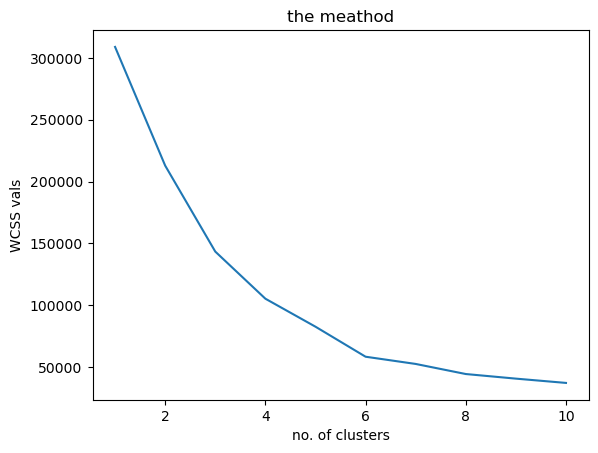

In [73]:
### found best n_clusters
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)


plt.plot(range(1,11),wcss)
plt.title('the meathod')    
plt.xlabel('no. of clusters')
plt.ylabel('WCSS vals')
plt.show()

In [74]:
# Apply K-Means 
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
df['Cluster'] = kmeans.fit_predict(X)


1. What type of machine learning problem is this?
This is an unsupervised learning problem.

2. What machine learning algorithms are suitable for customer segmentation tasks?
- Divides data into K clusters based on similarity.
- Groups data based on density and identifies outliers.



3. Plot the Answer 
The scatter plot provided visualizes the clusters identified by the KMeans algorithm . Each color represents a different cluster, showing how customers are grouped based on their features.

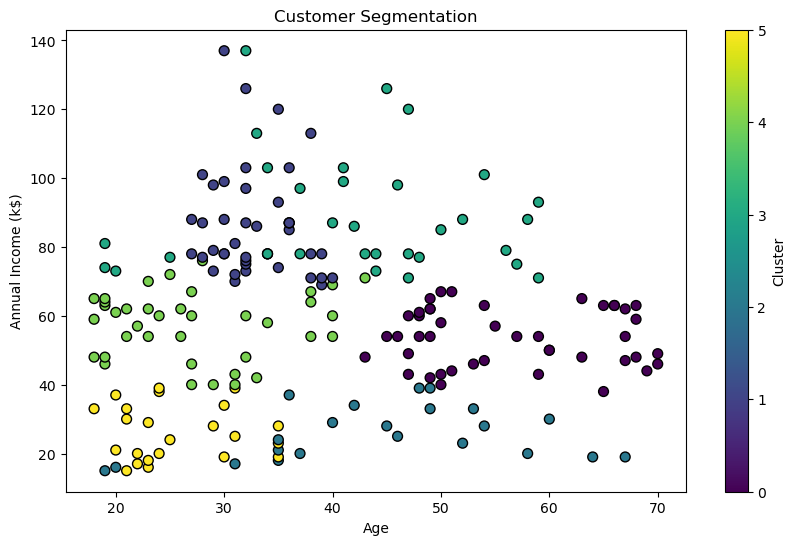

In [75]:
# Plot K-Means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='Cluster')
plt.show()